# Loan Data from Prosper

 - This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
 
 ###### created new Subset the dataframe by selecting features of interest
  - 'LoanOriginalAmount',
  - 'LoanStatus',
  - 'BorrowerRate',
  - 'Term', 
  - 'ListingCategory (numeric)',
  - 'BorrowerAPR', 
  - 'StatedMonthlyIncome',
  - 'IncomeRange',
  - 'LoanOriginationQuarter', 
  - 'ProsperScore', 
  - 'TotalInquiries',
  - 'EmploymentStatus',
  - 'ProsperRating (Alpha)'

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## - Data Gathering

In [50]:
# load in the dataset into a pandas dataframe, print statistics
loan = pd.read_csv('prosperLoanData.csv')

In [51]:
loan.shape


(113937, 81)

### Now created new Subset the dataframe by selecting features of interest

In [82]:
# Subset the dataframe by selecting features of interest
cols = ['LoanOriginalAmount','LoanStatus','BorrowerRate','Term', 'ListingCategory (numeric)',
        'BorrowerAPR', 'StatedMonthlyIncome','LoanOriginationQuarter', 'ProsperScore', 
        'TotalInquiries','EmploymentStatus','ProsperRating (Alpha)']
loan_sub = loan[cols]

In [83]:
loan_sub.head()

,LoanOriginalAmount,LoanStatus,BorrowerRate,Term,ListingCategory (numeric),BorrowerAPR,StatedMonthlyIncome,LoanOriginationQuarter,ProsperScore,TotalInquiries,EmploymentStatus,ProsperRating (Alpha)
0,9425,Completed,0.1580,36,0,0.16516,3083.333333,Q3 2007,NaN,3.0,Self-employed,NaN
1,10000,Current,0.0920,36,2,0.12016,6125.000000,Q1 2014,7.0,5.0,Employed,A
2,3001,Completed,0.2750,36,0,0.28269,2083.333333,Q1 2007,NaN,1.0,Not available,NaN
3,10000,Current,0.0974,36,16,0.12528,2875.000000,Q4 2012,9.0,1.0,Employed,A
4,15000,Current,0.2085,36,2,0.24614,9583.333333,Q3 2013,4.0,9.0,Employed,D


In [84]:
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanOriginalAmount         113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   Term                       113937 non-null  int64  
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   BorrowerAPR                113912 non-null  float64
 6   StatedMonthlyIncome        113937 non-null  float64
 7   LoanOriginationQuarter     113937 non-null  object 
 8   ProsperScore               84853 non-null   float64
 9   TotalInquiries             112778 non-null  float64
 10  EmploymentStatus           111682 non-null  object 
 11  ProsperRating (Alpha)      84853 non-null   object 
dtypes: float64(5), int64(3), object(4)
memory usage: 10.4+ MB


In [85]:
loan_sub.isna().sum()

LoanOriginalAmount               0
LoanStatus                       0
BorrowerRate                     0
Term                             0
ListingCategory (numeric)        0
BorrowerAPR                     25
StatedMonthlyIncome              0
LoanOriginationQuarter           0
ProsperScore                 29084
TotalInquiries                1159
EmploymentStatus              2255
ProsperRating (Alpha)        29084
dtype: int64

In [86]:
loan_sub.dropna(inplace = True)

<ipython-input-86-5f367e283f1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_sub.dropna(inplace = True)


In [87]:
loan_sub.head(5)

,LoanOriginalAmount,LoanStatus,BorrowerRate,Term,ListingCategory (numeric),BorrowerAPR,StatedMonthlyIncome,LoanOriginationQuarter,ProsperScore,TotalInquiries,EmploymentStatus,ProsperRating (Alpha)
1,10000,Current,0.0920,36,2,0.12016,6125.000000,Q1 2014,7.0,5.0,Employed,A
3,10000,Current,0.0974,36,16,0.12528,2875.000000,Q4 2012,9.0,1.0,Employed,A
4,15000,Current,0.2085,36,2,0.24614,9583.333333,Q3 2013,4.0,9.0,Employed,D
5,15000,Current,0.1314,60,1,0.15425,8333.333333,Q4 2013,10.0,2.0,Employed,B
6,3000,Current,0.2712,36,1,0.31032,2083.333333,Q2 2013,2.0,0.0,Employed,E


In [88]:
# save the cleaned data to csv file
loan_sub.to_csv('clean.csv',index=None)

In [90]:
#copy dataframe
main = loan_sub.copy()

#### What is the structure of dataset?
The dataset contains 113,937 loans with 81 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others)

#### What is/are the main feature(s) of interest in dataset?
 most interested in figureing out what features are best for predicting the borrower's Annual Percentage Rate (APR) for the loan.
 
#### What features in the dataset do you think will help support your investigation into feature(s) of interest?
I expect that the total loan amount will have a negative effect on the APR of the loan: the larger the total loan amount, the lower the APR. I also think that the borrowers stated monthly income, loan term, Prosper rating, employment status will also have effects on the APR.

### - Univariate Exploration


#### - 1 . Distributions loans Months Term?

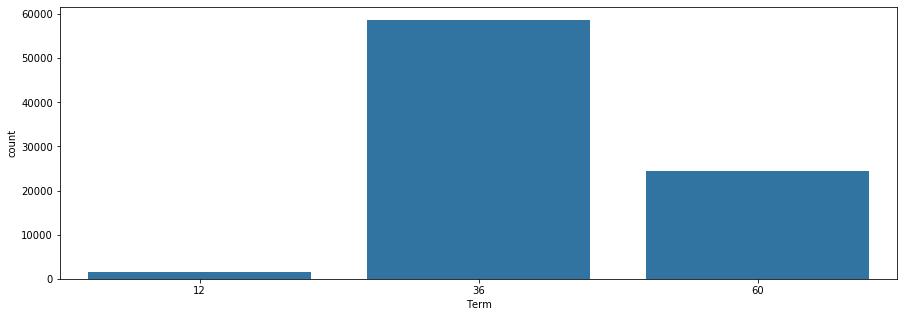

In [135]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = loan_sub, x = 'Term', color = base_color);




The length of most of the loans are 36 months. The ratings of most of the borrowers are among D to A. Most of borrowers are employed and full-time.

#### - 2 . Distributions LoanStatus?

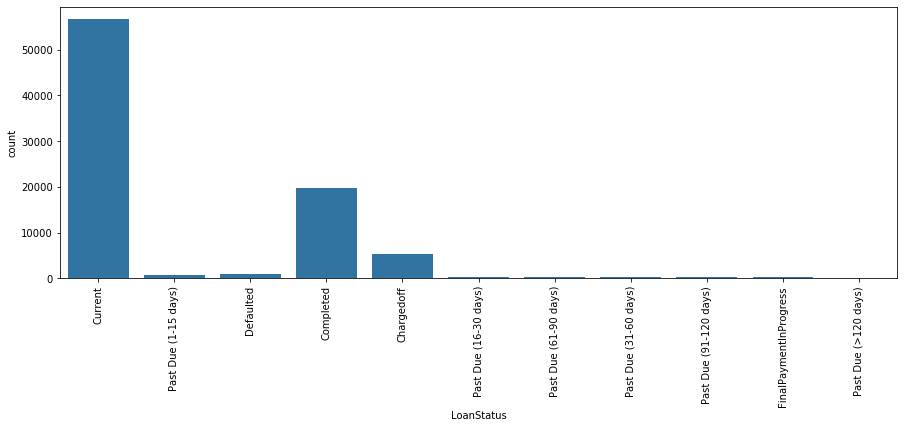

In [134]:
plt.figure(figsize = [15, 5])
sb.countplot(data = loan_sub, x = 'LoanStatus',color = base_color);
plt.xticks(rotation=90);

Overall, it appears that a large majority of loans are either Completed or Current, though there are also a large number of Charged-off and Defaulted (non-performing). A little later I will want to look at loan performance based on origination vintage.

Look at Prosper’s risk ratings of the loans:

#### - 3 . Distributions Loan ProsperRating of the borrows?

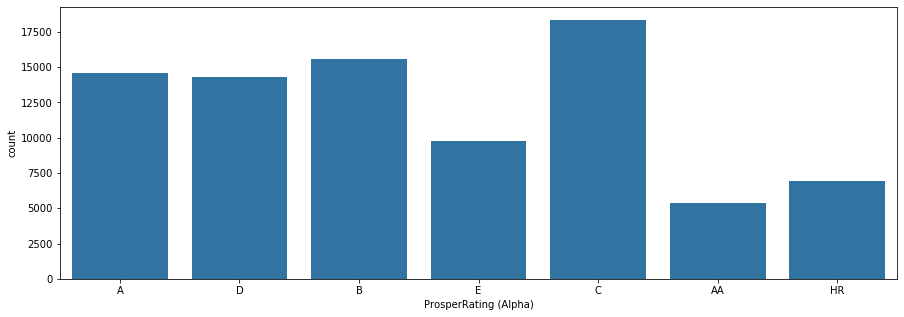

In [133]:
plt.figure(figsize = [15, 5])
sb.countplot(data = loan_sub, x = 'ProsperRating (Alpha)', color = base_color);

 The ratings of most of the borrowers are among D to A. 

#### - 4 . Employment Status of the borrows?

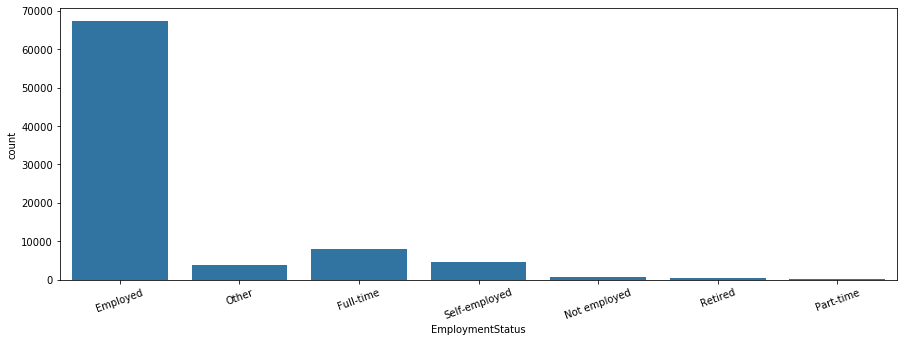

In [132]:
plt.figure(figsize = [15, 5])
sb.countplot(data = loan_sub, x = 'EmploymentStatus',color = base_color);
plt.xticks(rotation=20);


Most of borrowers are employed and full-time.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distributions of stated monthly income is highly right screwed. Most stated monthly incomes are less than 30k, but some of them are incredibly high, like greater than 100k. Surprisingly, most of borrowers with greater than 100k monthly income only loan less than 5k dollars. So, the very large stated monthly income may be made up. Overall, Less than 0.3 percent borrowers have stated monthly income greater than 30k, these can be seemed as outlier for the following analysis, so it is better to remove borrower records with income greater than 30k.

## - Bivariate Exploration

#### - 1. Finding the pairwise correlations present between features in the data.

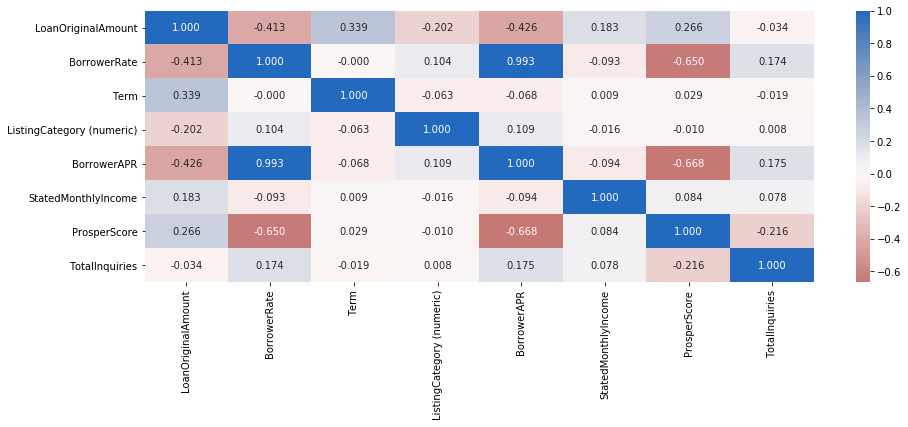

In [121]:
plt.figure(figsize = [15, 5])
sb.heatmap(main.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

The correlation coefficient of borrower APR and loan original amount is -0.323, the scatter plot also shows that these two variables are negatively correlated, which agrees with our hypothesis, that is the more the loan amount, the lower the APR. The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money.

#### - 2. let's look at relationships between the ProsperRating (Alpha) and Term

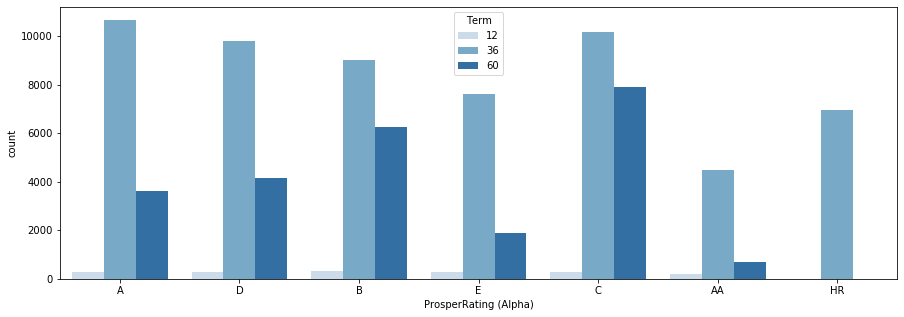

In [124]:
plt.figure(figsize = [15, 5])
sb.countplot(data = main, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

 we can see that there is a interaction between term and Prosper rating. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

#### - 3 let's look at relationships between the EmploymentStatus and Term

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

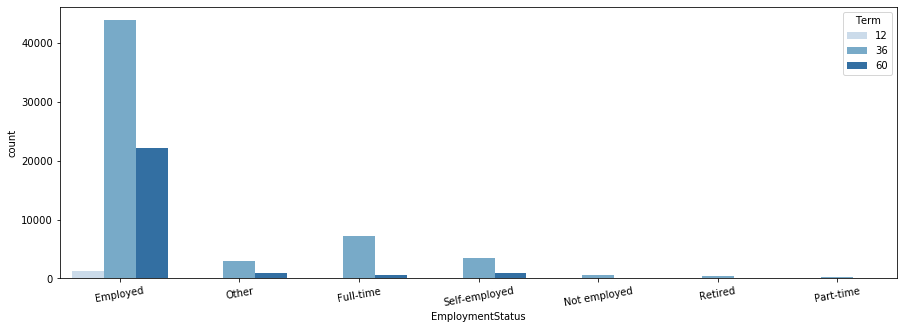

In [126]:
#  employment status vs. term
plt.figure(figsize = [15, 5])
sb.countplot(data = main, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)


The employment status variable do not have enough data on part-time, retired and not employed borrowers to show its interaction with term 

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The borrower APR is negatively associated with the loan original amount, which mean the more the loan amount, the lower the APR. It also shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. The Prosper rating also has a strong effect on the borrower APR, which decreases with the better rating.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
The loan original amount is positively correlated with the stated monthly income, it makes sense since borrowers with more monthly income could loan more money. It also shows that borrowers with better rating also have larger monthly income and loan amount. There is a interaction between prosper rating and term. Proportionally, there are more 60 month loans on B and C ratings. There is only 36 months loans for HR rating borrowers.

## Multivariate Exploration

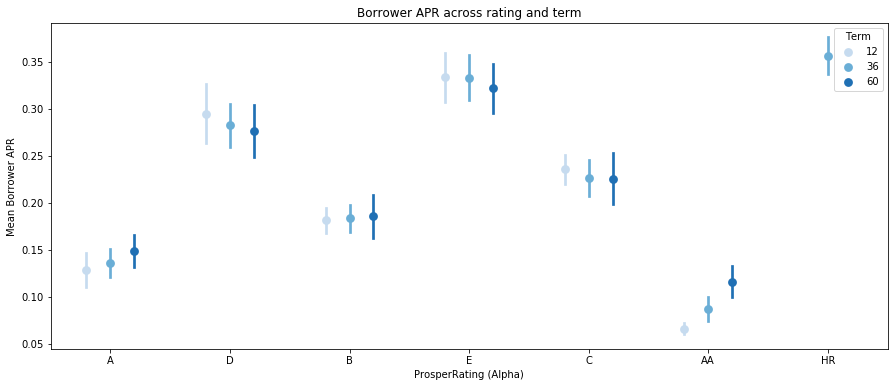

In [129]:

fig = plt.figure(figsize = [15,6])
ax = sb.pointplot(data = main, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

Interestingly, the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the increase of borrow term.

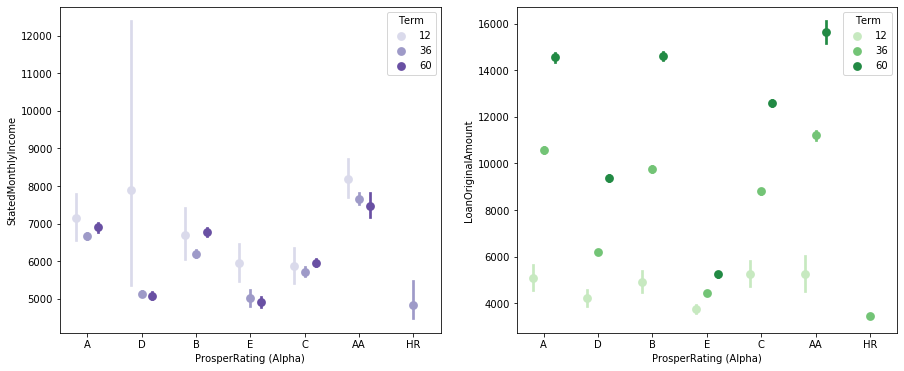

In [131]:

fig, ax = plt.subplots(ncols=2, figsize=[15,6])
sb.pointplot(data = main, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = loan_sub, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

For stated monthly income, it doesn't seem like there is a interaction effect between term and rating, the pattern of term is similar among different ratings. But for loan amount, there is a interaction between term and rating. We can see that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of borrower APR against loan amount by looking at the impact of the Prosper rating. The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive when the Prosper ratings increased from HR to AA. I then explored the rating and term effects on loan amount, it shows that with better Prosper rating, the loan amount of all three terms increases, the increase amplitude of loan amount between terms also becomes larger.

### Were there any interesting or surprising interactions between features?

A surprising interaction is that the borrower APR and loan amount is negatively correlated when the Prosper ratings are from HR to B, but the correlation is turned to be positive when the ratings are A and AA. Another interesting thing is that the borrower APR decrease with the increase of borrow term for people with HR-C raings. But for people with B-AA ratings, the APR increase with the borrow term.